# Oscillatory Systems
Physics 177, Spring 2018  
03 May 2018

Stephen Iota

## Discussion

The equations of motion for the simple, non-linear pendulum are:  

$\displaystyle \dot{\theta} = +\, \omega$  
$\displaystyle \dot{\omega} = -\frac{g}{\ell}\sin\theta$  

Write these as:  

$\displaystyle \dot{\theta} = f(\theta,\omega,t)$  
$\displaystyle \dot{\omega} = h(\theta,\omega,t)$  

The pendulum has length $\ell$, angle $\theta$ with respect to the vertical, angular velocity $\omega$, and gravitational acceleration at sea level is $g = 9.8$ m/s$^2$.

**Reminder**: Recall that the Runge-Kutta algorithm for solving $\dot x = f(x,t)$ is to loop the following sequence of steps:  
`k1 = dt*f(x,t)`  
`k2 = dt*f(x + 0.5*k1, t + 0.5*dt)`  
`x += k2`

## 1. Runge-Kutta for the simple pendulum

Write function `time_and_theta(ell, theta_0)` that outputs two Numpy arrays:  
1. an array of time slices
2. an array of associated $\theta$ values

In other words, the outputs of `time_and_theta(ell, theta_0)` are the required inputs for `matplotlib` to plot the trajectory. Use the Runge-Kutta algorithm to integrate the differential equations. Use MKS units, so that `g = 9.8`.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from math import sin as sin

# CONSTANTS
g = 9.8        # m/s**2

# PARAMETERS
ell = 1.0      # length of pendulum arm
theta_0 = 2.0  # initial displacement in radians
               # Note: this is *not* a small angle
omega_0 = 0.0  # initial angular velocity
dt = 0.01      # time sampling spacing
t_final = 10.0 # total number of seconds 

def f(theta, omega, t):
    """d(theta)/dt"""
    return omega
    
def h(theta, omega, t):
    """d(omega)/dt"""
    return -(g/ell) * sin(theta)

# TIME SLICES (depends on dt and t_final)
tpoints = np.arange(0,t_final,dt)

def time_and_angles():
    """
    Returns three Numpy arrays: 
    1. a list of time samples
    2. a list of theta values
    3. a list of omega values
    No arguments (these are all assumed to be global variables)
    """
    
    theta_points = []
    omega_points = []
    
    # Initialize theta, omega
    theta = theta_0
    omega = omega_0
    
    for t in tpoints:

        # Append theta, omega into theta_points and omega_points
        theta_points.append(theta)
        omega_points.append(omega)
        
        # Time step using Runge-Kutta
        k1_theta = dt*f(theta, omega, t)
        k1_omega = dt*h(theta, omega, t)
        
        #theta += 0.5*k1_theta
        #omega += 0.5*k1_omega    why doesn't this method work?
        #t += 0.5*t
        
        k2_theta = dt*f(theta + 0.5*k1_theta, omega, t)
        k2_theta = dt*f(theta, omega + 0.5*k1_omega, t)
        k2_theta = dt*f(theta, omega, t + 0.5*t)
        
        k2_omega = dt*h(theta + 0.5*k1_theta, omega, t)
        k2_omega = dt*h(theta, omega + 0.5*k1_omega, t)
        k2_omega = dt*h(theta, omega, t + 0.5*t)
    
        theta += k2_theta
        omega += k2_omega
    
    return np.array(tpoints), np.array(theta_points), np.array(omega_points)

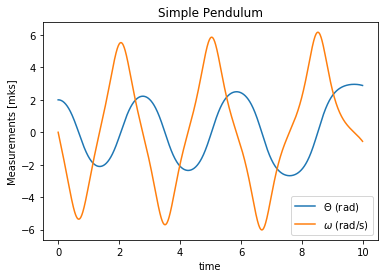

In [2]:
# Test the above code:
times, thetas, omegas = time_and_angles()

plt.plot(times, thetas, label='$\Theta$ (rad)')
plt.plot(times, omegas, label='$\omega$ (rad/s)')
plt.title("Simple Pendulum")
plt.xlabel('time')
plt.ylabel('Measurements [mks]')
plt.legend()
plt.show()

## 2. Plotting Phase Space

Plot the **phase space trajectory** of the simple pendulum over the range 0 to 10 seconds with the initial conditiosn above. A phase space diagram has $\theta$ on the horizontal axis and momentum on the vertical axis. Assume that the pendulum weight has unit mass. 

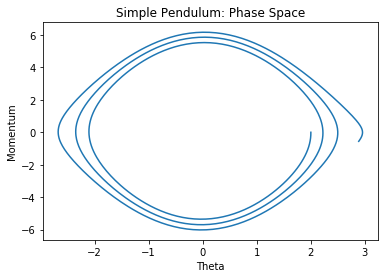

In [20]:
# Test the above code:
m = 1. # unity
mom_points = m*omegas
plt.plot(thetas, mom_points)
plt.title("Simple Pendulum: Phase Space")
plt.xlabel('Theta')
plt.ylabel('Momentum')
plt.show()

## 3. Plot of Energy with Respect to Time

The energy of the simple pendulum is  

$\displaystyle E = \frac{1}{2} m \ell^2 \omega^2 + m g \ell \left(1-\cos\theta\right)$

**Hint:** Numpy arrays are "built" for being manipulated as mathematical objects. Thus it may be useful to observe the following operations:

In [8]:
test_numpy_array=np.array([3.14,1.55])

print(np.cos(test_numpy_array))
print(test_numpy_array**2)

[-0.99999873  0.02079483]
[9.8596 2.4025]


Using the outputs of your code from Problem 1, create a Numpy array of energy at each time step and plot energy as a function of time. 

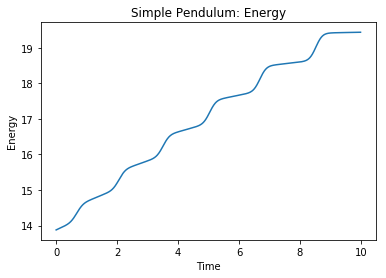

In [3]:
m = 1.0

energies = 0.5*m*(ell**2)*(omegas**2) + m*g*ell*(1 - np.cos(thetas))

plt.plot(times, energies)
plt.title("Simple Pendulum: Energy")
plt.xlabel('Time')
plt.ylabel('Energy')
plt.show()

energy increases over time, NOT conserved!

## 4. Leap-Frog to the Rescue

The leap-frog algorithm is as follows:

$$\displaystyle x(t+\delta t) = x(t) + \delta t\; f\left(x\left(t+\frac{\delta t}{2}\right), t + \frac{\delta t}{2} \right)$$  

In [4]:
def time_and_angles_leapfrog():
    """
    Returns three Numpy arrays: 
    1. a list of time samples 
    2. a list of theta values
    3. a list of omega values
    No arguments (these are all assumed to be global variables)
    Uses leap-frog algorithm
    """
    
    theta_points = []
    omega_points = []
    
    # Initialize theta, omega
    theta = theta_0
    omega = omega_0
    theta_half = theta + 0.5*dt*f(theta, omega, 0)
    omega_half = omega + 0.5*dt*h(theta, omega, 0)
    
    for t in tpoints:
        # Append theta, omega to theta_points and omega_points
        theta_points.append(theta)
        omega_points.append(omega)
        
        # Time step using Leap-Frog 
        theta += dt*f(theta_half, omega, t + dt/2)
        omega += dt*h(theta, omega_half, t + dt/2)
        
        theta_half += dt*f(theta, omega, t + dt)
        omega_half += dt*h(theta, omega, t + dt)
        # NOTE: these depend on theta[i+1] and omega[i+1]

    return np.array(tpoints), np.array(theta_points), np.array(omega_points)

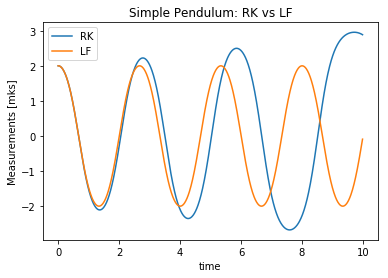

In [5]:
# Compare to the RK results: theta
times, thetas_lf, omegas_lf = time_and_angles_leapfrog()

plt.plot(times, thetas, label='RK')
plt.plot(times, thetas_lf, label='LF')
plt.title("Simple Pendulum: RK vs LF")
plt.xlabel('time')
plt.ylabel('Measurements [mks]')
plt.legend()
plt.show()

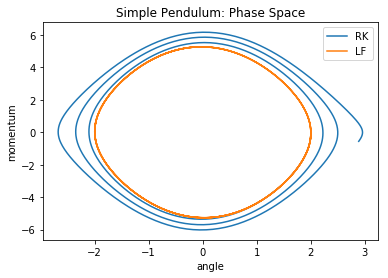

In [6]:
# COMPARE to the RK phase space results

plt.plot(thetas, omegas, label='RK')
plt.plot(thetas_lf, omegas_lf, label='LF')
plt.title("Simple Pendulum: Phase Space")
plt.xlabel('angle')
plt.ylabel('momentum')
plt.legend()
plt.show()

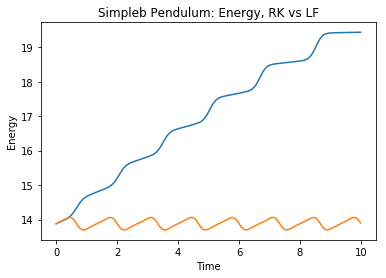

In [7]:
m = 1.0

energies_lf = 0.5*m*(ell**2)*(omegas_lf**2) + m*g*ell*(1 - np.cos(thetas_lf))

plt.plot(times, energies, label='RK')
plt.plot(times, energies_lf, label='LF')
plt.title("Simpleb Pendulum: Energy, RK vs LF")
plt.xlabel('Time')
plt.ylabel('Energy')
plt.show()

Energy is conserved in the leap frog method!